<a href="https://colab.research.google.com/github/kwnstantinosRoumeliwtis/ML_course/blob/main/ML_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install swig


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.2 MB/s eta 0:00:00


In [ ]:
!pip install gymnasium[box2d]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 52.5 MB/s eta 0:00:00


In [ ]:
!pip install renderlab


In [ ]:
!pip install stable-baselines3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 4.5 MB/s eta 0:00:00


2) Η συνάρτηση step στην ουσία προχωράει το παιχνίδι στο επόμενο χρονικό σημείο, όπου κάνουμε τη νέα παρατήρηση, μετά το action που έχει επιλεγεί και γίνεται η εκτίμηση του reward με βάση τη νέα κατάσταση που φτάσαμε. Κάθε επεισόδιο αποτελείται από steps. Η συνάρτηση reset μας φέρνει στην αρχική κατάσταση για να ξεκινήσει ένα νέο επεισόδιο. Η συνάρτηση render δημιουργεί το γραφικό περιβάλλον, τον πράκτορα και οπτικοποιεί τις δράσεις του.

3)  Observation Space: 0 οριζόντια θέση, 1 κατακόρυφη θέση, 2 οριζόντια ταχύτητα, 3 κατακόρυφη ταχύτητα, 4 γωνία σκάφους, 5 γωνιακή ταχύτητα, 6 επαφή αριστερού ποδιού, 7 επαφή δεξιού ποδιού. Action Space: 0 καμία ενέργεια, 1 κύριος κινητήρας, 2 αριστερός κινητήρας, 3 δεξιός κινητήρας. Reward: θετικό για προσγείωση στον στόχο, για χαμηλές ταχύτητες και σταθερή γωνία. Αρνητικό για σύγκρουση, μεγάλες ταχύτητες και καύση καυσίμων.

4)

In [ ]:
import gymnasium as gym
import renderlab
import numpy as np


/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
  if event.key is 'enter':



In [ ]:
env = gym.make("LunarLander-v3", render_mode="rgb_array")


In [ ]:
import imageio
from IPython.display import HTML, display
import base64


In [ ]:
def show_video(frames, fps=30):
    path = "lander.mp4"
    imageio.mimsave(path, frames, fps=fps)

    with open(path, "rb") as f:
        video = f.read()

    encoded = base64.b64encode(video).decode()
    display(HTML(f"""
    <video width="500" controls>
        <source src="data:video/mp4;base64,{encoded}" type="video/mp4">
    </video>
    """))


In [ ]:
def run_random_agent(env, episodes=5):
    scores = []

    for ep in range(episodes):
        obs, _ = env.reset()
        done = False
        total_reward = 0
        frames = []

        while not done:
            action = env.action_space.sample()
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
            frames.append(env.render())

        scores.append(total_reward)

        print(f"Episode {ep+1} reward: {total_reward:.2f}")
        show_video(frames)

    print("Average reward:", np.mean(scores))
    return scores


5)

In [ ]:
random_scores = run_random_agent(env, episodes=5)


Episode 1 reward: -112.44


Episode 2 reward: -285.27


Episode 3 reward: -115.56


Episode 4 reward: -194.27


Episode 5 reward: -100.35


Average reward: -161.57793957874324


6)

In [ ]:
from stable_baselines3 import DQN, PPO
from stable_baselines3.common.evaluation import evaluate_policy
import time

env = gym.make("LunarLander-v3")

start = time.time()
dqn = DQN(
    "MlpPolicy",
    env,
    learning_rate=1e-3,
    buffer_size=100_000,
    batch_size=64,
    gamma=0.99,
    exploration_fraction=0.1,
    verbose=1
)

dqn.learn(total_timesteps=200_000)
dqn_time = time.time() - start


  return datetime.utcnow().replace(tzinfo=utc)

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


  return datetime.utcnow().replace(tzinfo=utc)



----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.8     |
|    ep_rew_mean      | -124     |
|    exploration_rate | 0.981    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 765      |
|    time_elapsed     | 0        |
|    total_timesteps  | 395      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 2.78     |
|    n_updates        | 73       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87.9     |
|    ep_rew_mean      | -181     |
|    exploration_rate | 0.967    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 854      |
|    time_elapsed     | 0        |
|    total_timesteps  | 703      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 3.84     |
|    n_updates      

In [ ]:
mean_dqn, _ = evaluate_policy(dqn, env, n_eval_episodes=5)
print("DQN mean reward:", mean_dqn)


  warnings.warn(



DQN mean reward: -38.7520530401729


In [ ]:
start = time.time()
ppo = PPO(
    "MlpPolicy",
    env,
    learning_rate=3e-4,
    n_steps=2048,
    batch_size=64,
    gamma=0.99,
    gae_lambda=0.95,
    verbose=1
)

ppo.learn(total_timesteps=200_000)
ppo_time = time.time() - start


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 91.2     |
|    ep_rew_mean     | -196     |
| time/              |          |
|    fps             | 1021     |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 119       |
|    ep_rew_mean          | -174      |
| time/                   |           |
|    fps                  | 692       |
|    iterations           | 2         |
|    time_elapsed         | 5         |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.0055107 |
|    clip_fraction        | 0.00859   |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.38     |
|    e

In [ ]:
mean_ppo, _ = evaluate_policy(ppo, env, n_eval_episodes=5)
print("PPO mean reward:", mean_ppo)

  warnings.warn(



PPO mean reward: 109.33512461054757


In [ ]:
import matplotlib.pyplot as plt


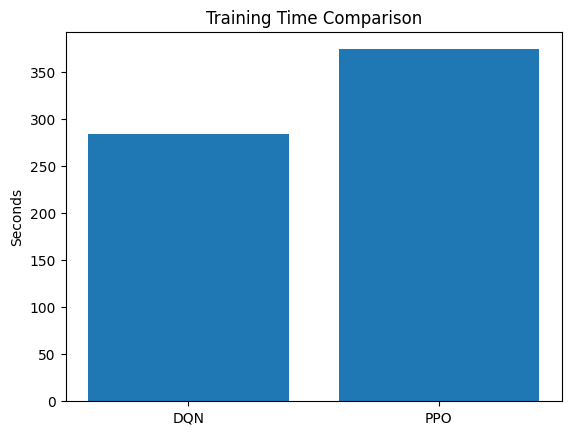

In [ ]:
algorithms = ["DQN", "PPO"]
training_times = [dqn_time, ppo_time]

plt.figure()
plt.bar(algorithms, training_times)
plt.ylabel("Seconds")
plt.title("Training Time Comparison")
plt.show()


  return datetime.utcnow().replace(tzinfo=utc)



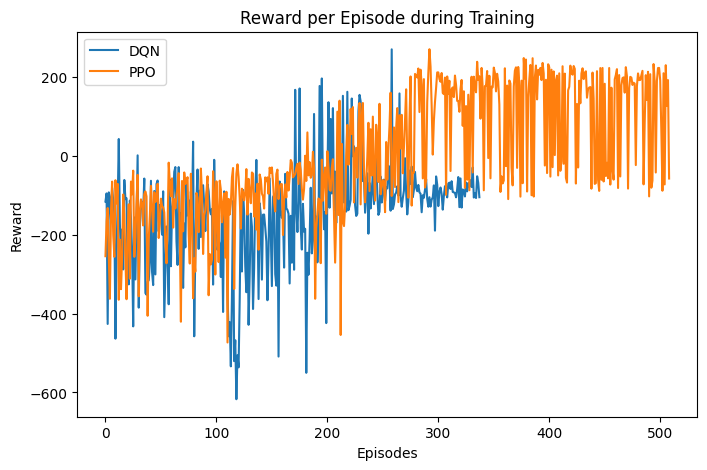

In [ ]:
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy
import os

log_dir_dqn = "./logs_dqn/"
log_dir_ppo = "./logs_ppo/"
os.makedirs(log_dir_dqn, exist_ok=True)
os.makedirs(log_dir_ppo, exist_ok=True)

env_dqn = Monitor(gym.make("LunarLander-v3"), log_dir_dqn)
env_ppo = Monitor(gym.make("LunarLander-v3"), log_dir_ppo)

dqn = DQN("MlpPolicy", env_dqn, verbose=0)
dqn.learn(total_timesteps=200_000)

ppo = PPO("MlpPolicy", env_ppo, verbose=0)
ppo.learn(total_timesteps=200_000)

x_dqn, y_dqn = ts2xy(load_results(log_dir_dqn), "episodes")
x_ppo, y_ppo = ts2xy(load_results(log_dir_ppo), "episodes")

plt.figure(figsize=(8,5))
plt.plot(x_dqn, y_dqn, label="DQN")
plt.plot(x_ppo, y_ppo, label="PPO")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Reward per Episode during Training")
plt.legend()
plt.show()


8)

In [ ]:
ppo = PPO(
    "MlpPolicy",
    env,
    learning_rate=3e-4,
    n_steps=1024,
    batch_size=64,
    n_epochs=4,
    gamma=0.99,
    gae_lambda=0.98,
    clip_range=0.2,
    ent_coef=0.01,
    verbose=1
)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
dqn = DQN(
    "MlpPolicy",
    env,
    learning_rate=1e-4,
    buffer_size=100000,
    batch_size=128,
    gamma=0.99,
    train_freq=1,
    target_update_interval=250,
    exploration_fraction=0.1,
    exploration_final_eps=0.05,
    verbose=1
)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
dqn.learn(total_timesteps=500_000)    # Περισσότερα steps
ppo.learn(total_timesteps=500_000)    # Λιγότερο αλλά αποτελεσματικό


Streaming output truncated to the last 5000 lines.
|    value_loss           | 36.3         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 656          |
|    ep_rew_mean          | 52.8         |
| time/                   |              |
|    fps                  | 728          |
|    iterations           | 252          |
|    time_elapsed         | 354          |
|    total_timesteps      | 258048       |
| train/                  |              |
|    approx_kl            | 0.0017736147 |
|    clip_fraction        | 0.000244     |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.03        |
|    explained_variance   | 0.458        |
|    learning_rate        | 0.0003       |
|    loss                 | 104          |
|    n_updates            | 1004         |
|    policy_gradient_loss | -0.00134     |
|    value_loss           | 262          |
---